In [15]:
import seaborn as sns
import numpy as np
import sqlalchemy as sql
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
host = "192.168.1.34"
user = "ecoetl"
pwd = "ECO4etl"
db = "iotmgmt"

engine = sql.create_engine(f"mysql+mysqldb://{user}:{pwd}@{host}/{db}?charset=utf8", pool_recycle=3600)

In [2]:
data = np.array([57, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 81])
data

array([57, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73,
       75, 75, 76, 76, 78, 79, 81])

In [3]:
np.quantile(data, 0.5)

70.0

In [4]:
np.quantile(data, 0.75)

75.0

In [5]:
np.quantile(data, 0.25)

66.0

In [6]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


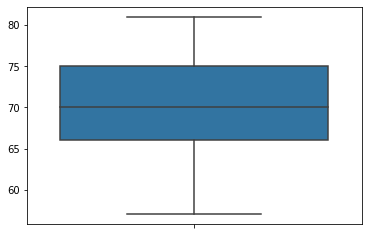

In [7]:
ax = sns.boxplot(y=data)

In [19]:
qq = "SELECT receivedSync, hour(receivedSync) as `Hour`, totalDissovedSolids FROM iotmgmt.waterQuality where ieee in ('00124b000be4ea63') and receivedSync>=CURDATE() order by receivedSync desc;"
tb = pd.read_sql_query(qq, engine)

In [22]:
tb

,receivedSync,Hour,totalDissovedSolids
0,2020-11-25 10:35:00,10,10.6
1,2020-11-25 10:34:00,10,10.6
2,2020-11-25 10:33:00,10,10.6
3,2020-11-25 10:32:00,10,10.6
4,2020-11-25 10:31:00,10,10.6
...,...,...,...
632,2020-11-25 00:04:00,0,11.3
633,2020-11-25 00:03:00,0,11.3
634,2020-11-25 00:02:00,0,11.3
635,2020-11-25 00:01:00,0,11.3


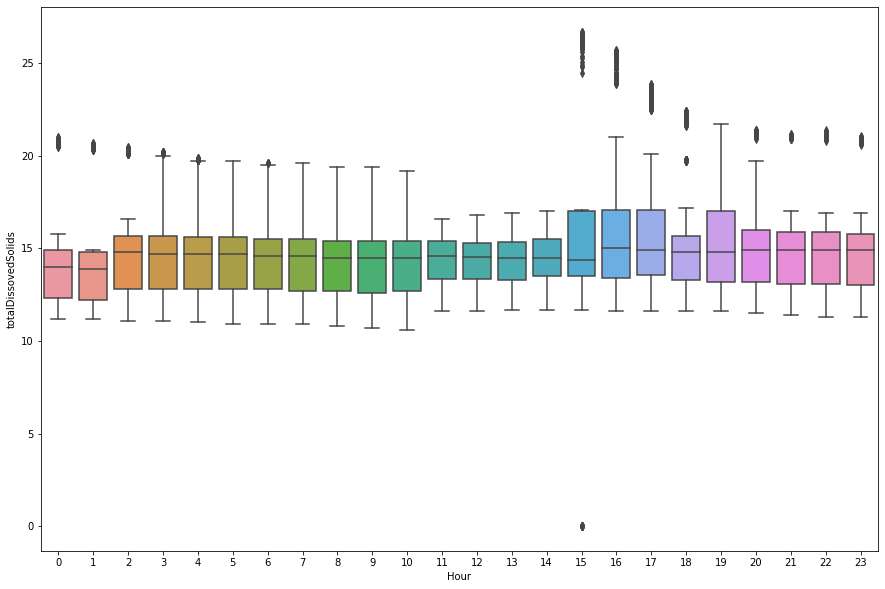

In [18]:
fig = plt.figure(figsize = (15,10))
ax = sns.boxplot(x="Hour", y="totalDissovedSolids", data=tb)

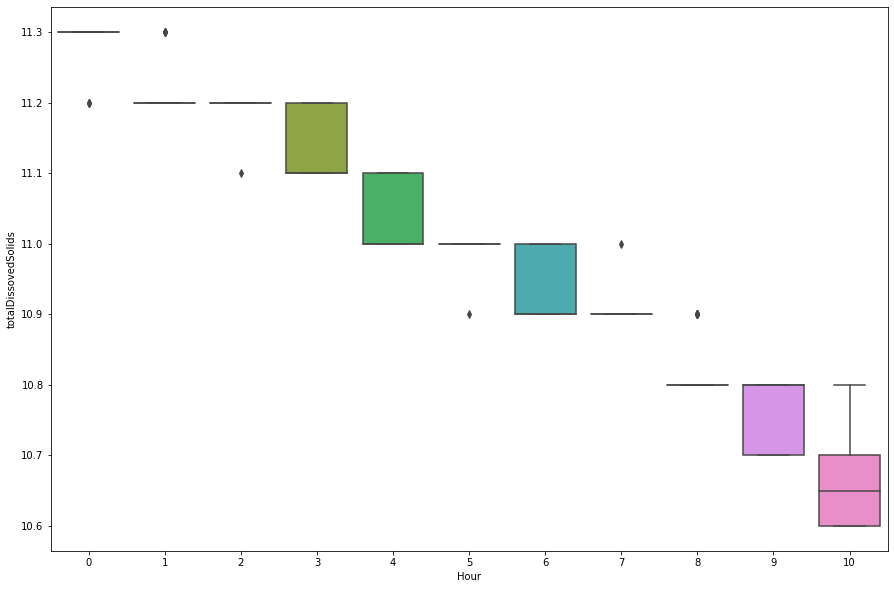

In [21]:
fig = plt.figure(figsize = (15,10))
ax = sns.boxplot(x="Hour", y="totalDissovedSolids", data=tb)